# DSR - Deep Learning from Scratch  - Day 1
Welcome! During the following two days you will be working on this Python package. You will be asked to make some changes in the package code as well in this notebook, thanks to importlib you just have to do `Kernel -> Restart and Run All` to see how your changes in action.

In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)
reload(johnny_deep.optimizers)

<module 'johnny_deep.optimizers' from '/Users/marco/Area51/johnny_deep/johnny_deep/optimizers.py'>

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

We will use the `make_moons` dataset as a toy example, it will have very few sample but it's non linear enough to make the workshop interesting.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

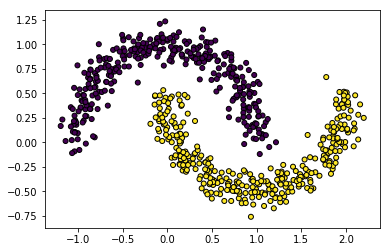

In [5]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [6]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 10, "type": "relu"},
    {"dimension": 10, "type": "relu"},
    {"dimension": 1, "type": "sigmoid"},
]

In [10]:
m = johnny_deep.models.Model(nn_architecture)
optimizer = johnny_deep.optimizers.GradientDescent(learning_rate=0.3)
theta = m.fit(X_train, Y_train, optimizer, no_of_epochs=2000, gradient_check_every=100, print_every=100)

Layer 1: relu dimension 10
W shape: (10, 2)
b shape: (10, 1)
Layer 2: relu dimension 10
W shape: (10, 10)
b shape: (10, 1)
Layer 3: sigmoid dimension 1
W shape: (1, 10)
b shape: (1, 1)
Epoch 0, cost: 0.692586311314827
Epoch 100, cost: 0.26560782223395335
{'W1': True, 'b1': True, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 200, cost: 0.2347996338531621
{'W1': True, 'b1': True, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 300, cost: 0.21522929195407012
{'W1': True, 'b1': True, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 400, cost: 0.20901983443644492
{'W1': True, 'b1': True, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 500, cost: 0.20747696110052788
{'W1': False, 'b1': False, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 600, cost: 0.20679643966625438
{'W1': True, 'b1': True, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 700, cost: 0.20636160962158734
{'W1': False, 'b1': False, 'W2': True, 'b2': True, 'W3': True, 'b3': True}
Epoch 800

In [11]:
Y_hat = m.forward(theta, X_test)

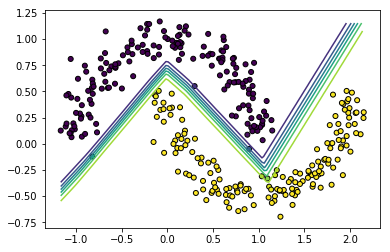

In [12]:
johnny_deep.utils.plot_with_countours(plt, X_test, Y_hat, m, theta)